# Section 3: Training a Supervised Learning Model
### Lecture 9: Improving the Logistic Regression Model through Hyperparameter Selection
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit_card.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [3]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[27657,   775],
       [    4,    45]], dtype=int64)

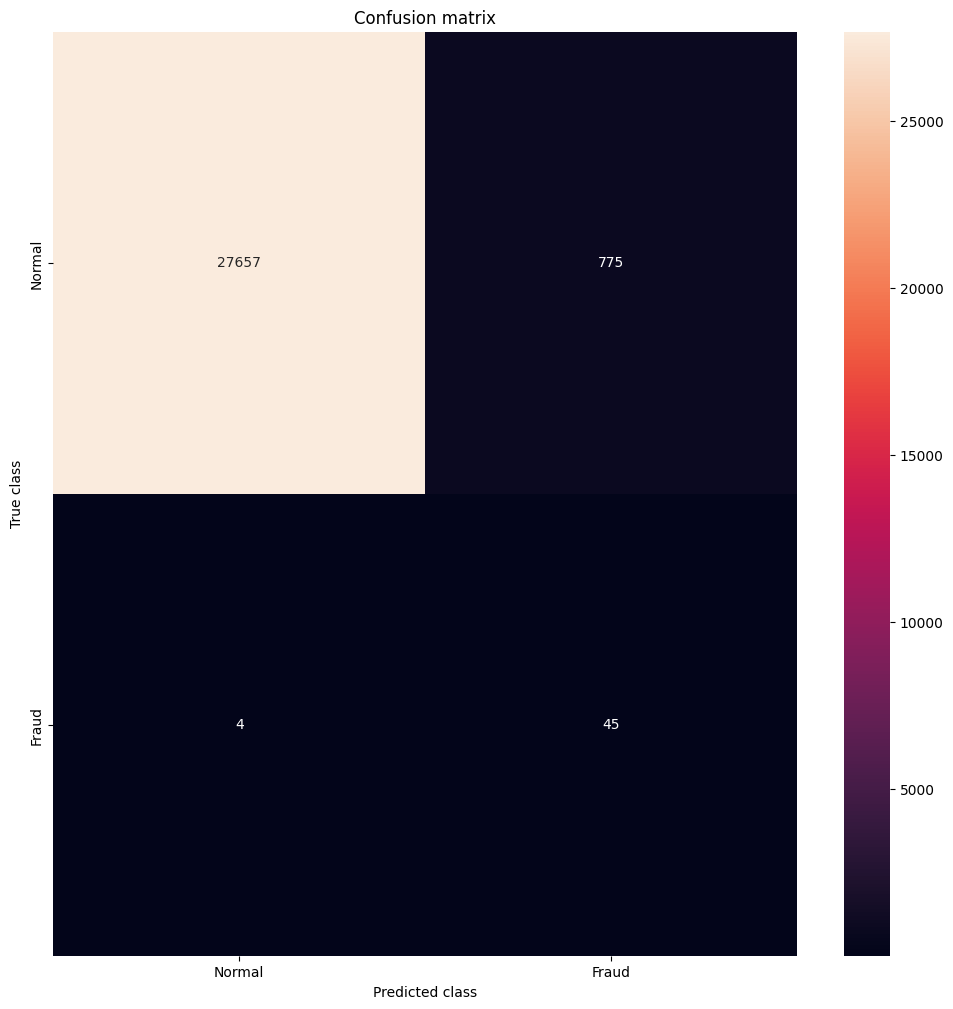

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

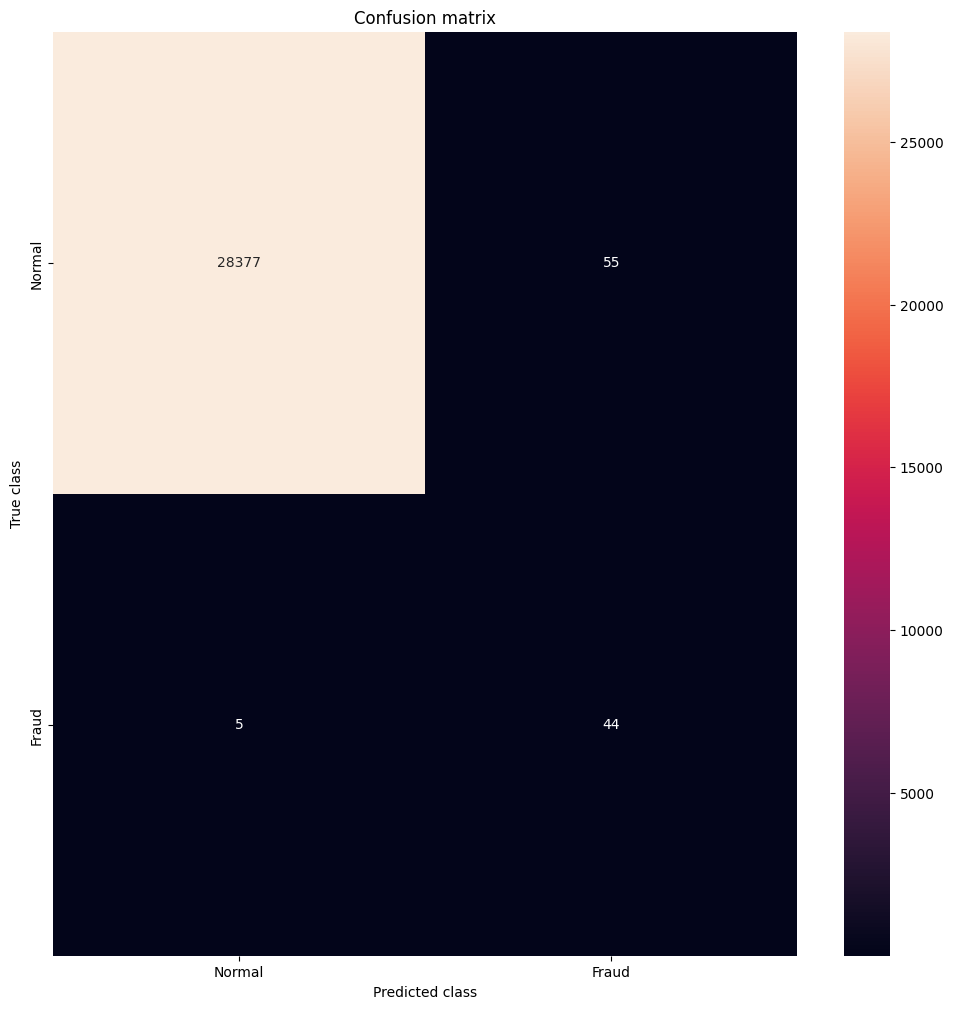

In [6]:
model = LogisticRegression(class_weight={0:1, 1:50})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()